# Movie recommendetion system

In [26]:
import pandas as pd
import numpy as np

In [27]:
df = pd.read_csv("movies.csv") 
df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [28]:
df1 = pd.read_csv("ratings.csv")
df1.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [29]:
#Merging both files
data = pd.merge(df,df1) 
data.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [30]:
# Calculating mean rating 
data.groupby('title')['rating'].mean().sort_values(ascending=False).head()


title
Karlson Returns (1970)                           5.0
Winter in Prostokvashino (1984)                  5.0
My Love (2006)                                   5.0
Sorority House Massacre II (1990)                5.0
Winnie the Pooh and the Day of Concern (1972)    5.0
Name: rating, dtype: float64

In [32]:
#Calculating count rating of all movies.
data.groupby('title')['rating'].count().sort_values(ascending=False).head() 

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

In [24]:
Ratings = pd.DataFrame(data.groupby('title')['rating'].mean())  
Ratings['num of ratings'] = pd.DataFrame(data.groupby('title')['rating'].count()) 
Ratings.head() 

,rating,num of ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


Text(0.5, 0, 'Number Of Ratings')

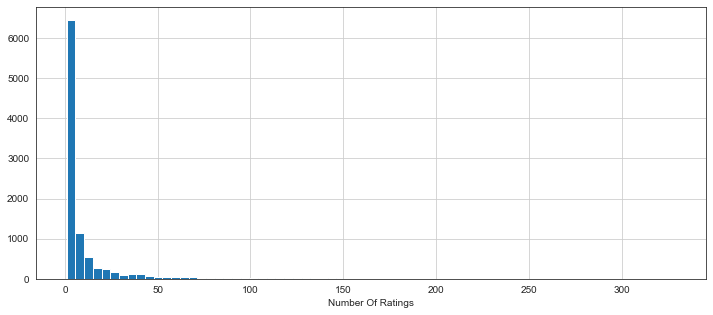

In [21]:
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set_style('white') 
%matplotlib inline 

# ploting graph of 'num of ratings column' 
plt.figure(figsize =(12, 5))   
Ratings['num of ratings'].hist(bins = 70) 
plt.xlabel("Number Of Ratings")

Text(0.5, 0, 'Rating')

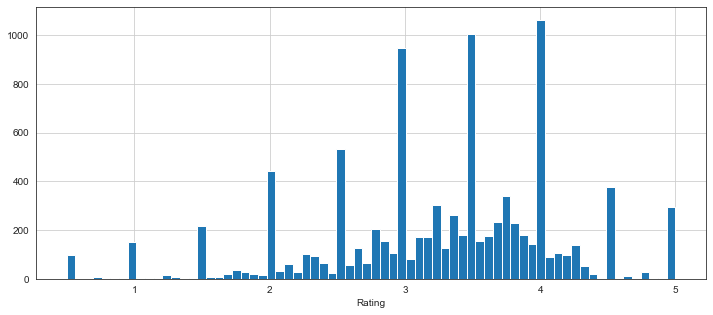

In [33]:
# plot graph of 'ratings' column 
plt.figure(figsize =(12, 5)) 
Ratings['rating'].hist(bins = 70)
plt.xlabel("Rating")

In [36]:
Movie = data.pivot_table(index ="userId",columns ='title', values ='rating')   
Movie.head() 
Ratings.sort_values('num of ratings', ascending = False).head()

,rating,num of ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278


In [12]:
# analysing correlation with similar movies 
ToyStory_user_ratings = Movie["Toy Story (1995)"]
BatmanForever_user_ratings = Movie['Batman Forever (1995)'] 
JungleBook_user_ratings = Movie["Jungle Book, The (1994)"]
ToyStory_user_ratings.head() 

userId
1    4.0
2    NaN
3    NaN
4    NaN
5    4.0
Name: Toy Story (1995), dtype: float64

In [13]:
BatmanForever_user_ratings.head()

userId
1    NaN
2    NaN
3    NaN
4    NaN
5    3.0
Name: Batman Forever (1995), dtype: float64

In [37]:
JungleBook_user_ratings.head() 

userId
1    5.0
2    NaN
3    NaN
4    NaN
5    NaN
Name: Jungle Book, The (1994), dtype: float64

In [38]:
# analysing correlation with similar movies 
similar_to_ToyStory = Movie.corrwith(ToyStory_user_ratings) 
similar_to_BatmanForever = Movie.corrwith(BatmanForever_user_ratings) 
similar_to_JungleBook= Movie.corrwith(BatmanForever_user_ratings)

  
corr_ToyStory = pd.DataFrame(similar_to_ToyStory, columns =['Correlation']) 
corr_ToyStory.dropna(inplace = True) 
corr_ToyStory.head() 

,Correlation
title,
"'burbs, The (1989)",0.240563
(500) Days of Summer (2009),0.353833
*batteries not included (1987),-0.427425
10 Cent Pistol (2015),1.000000
10 Cloverfield Lane (2016),-0.285732


In [39]:
corr_BatmanForever = pd.DataFrame(similar_to_BatmanForever, columns =['Correlation']) 
corr_BatmanForever.dropna(inplace = True) 
corr_BatmanForever.head() 

,Correlation
title,
"'burbs, The (1989)",-0.169125
(500) Days of Summer (2009),0.263569
*batteries not included (1987),-1.000000
10 Cloverfield Lane (2016),1.000000
10 Things I Hate About You (1999),0.595994


In [17]:
corr_JungleBook = pd.DataFrame(similar_to_JungleBook, columns =['Correlation']) 
corr_JungleBook.dropna(inplace = True) 
corr_JungleBook.head() 

,Correlation
title,
"'burbs, The (1989)",-0.169125
(500) Days of Summer (2009),0.263569
*batteries not included (1987),-1.000000
10 Cloverfield Lane (2016),1.000000
10 Things I Hate About You (1999),0.595994


In [40]:
# Similar movies like Toy Story
corr_ToyStory = pd.DataFrame(similar_to_ToyStory, columns =['Correlation']) 
corr_ToyStory.dropna(inplace = True) 
corr_ToyStory = corr_ToyStory.join(Ratings['num of ratings']) 
print("Movies Similer like ToyStory")
corr_ToyStory[corr_ToyStory['num of ratings']>100].sort_values('Correlation', ascending = False).head()

Movies Similer like ToyStory


,Correlation,num of ratings
title,,
Toy Story (1995),1.000000,215
"Incredibles, The (2004)",0.643301,125
Finding Nemo (2003),0.618701,141
Aladdin (1992),0.611892,183
"Monsters, Inc. (2001)",0.490231,132


In [41]:
# Similar movies like Batman Forever 
corr_BatmanForever.sort_values('Correlation', ascending = False).head(10) 
corr_BatmanForever = corr_BatmanForever.join(Ratings['num of ratings'])   
corr_BatmanForever.head()
print("Movies Similer like Batman Forever")
corr_BatmanForever[corr_BatmanForever['num of ratings']>100].sort_values('Correlation', ascending = False).head()

Movies Similer like Batman Forever


,Correlation,num of ratings
title,,
Batman Forever (1995),1.000000,137
Outbreak (1995),0.538997,101
Full Metal Jacket (1987),0.525268,102
Finding Nemo (2003),0.516633,141
Shrek (2001),0.488341,170


In [42]:
# Similar movies like JungleBook
corr_JungleBook = pd.DataFrame(similar_to_JungleBook, columns =['Correlation']) 
corr_JungleBook.dropna(inplace = True) 
corr_JungleBook = corr_JungleBook.join(Ratings['num of ratings']) 
print("Movies Similer like JungleBook")
corr_JungleBook[corr_JungleBook['num of ratings']>100].sort_values('Correlation', ascending = False).head()


Movies Similer like JungleBook


,Correlation,num of ratings
title,,
Batman Forever (1995),1.000000,137
Outbreak (1995),0.538997,101
Full Metal Jacket (1987),0.525268,102
Finding Nemo (2003),0.516633,141
Shrek (2001),0.488341,170
